<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/si_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [14]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from functools import partial
import jax.scipy.stats.norm

### **Parameters**

In [27]:
p = jnp.array([.48, .46, .06])
n = 3385
key = jax.random.PRNGKey(0)

### **Sample Mean**

In [4]:
def sample_mean(n, candidate, key):
  votes = jax.random.choice(key, a=jnp.array([0, 1, 2]), p=p, shape=(n,))
  return jnp.mean(votes==candidate)

In [5]:
print(f"Fraction voting for Kamala: {sample_mean(3385, 0, jax.random.PRNGKey(0)):.3f}")
print(f"Fraction voting for Trump: {sample_mean(3385, 1, jax.random.PRNGKey(0)):.3f}")
print(f"Fraction voting for Other: {sample_mean(3385, 2, jax.random.PRNGKey(0)):.3f}")

Fraction voting for Kamala: 0.483
Fraction voting for Trump: 0.456
Fraction voting for Other: 0.061


### **Simulate Sample Mean**

In [6]:
f = partial(sample_mean, 3385, 0)
keys = jax.random.split(jax.random.PRNGKey(0), 10000)
results = jax.vmap(f)(keys)

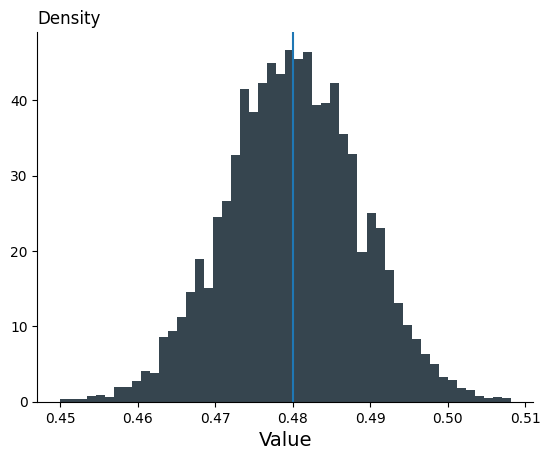

In [7]:
plt.hist(results, bins=50, density=True, color="#36454F")
plt.axvline(jnp.mean(results))
plt.title('Density', loc='left')
plt.xlabel("Value", size=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [8]:
def normalized_sample_mean(n, candidate, key):
  numerator = sample_mean(n, candidate, key) - p[candidate]
  denominator = jnp.sqrt(p[candidate]*(1-p[candidate])) / jnp.sqrt(n)
  return numerator/ denominator

In [9]:
f = partial(normalized_sample_mean, 1000, 0)
keys = jax.random.split(jax.random.PRNGKey(0), 50000)
results = jax.vmap(f)(keys)

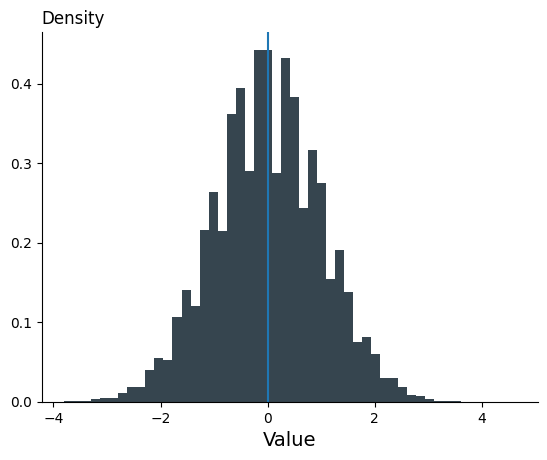

In [10]:
plt.hist(results, bins=50, density=True, color="#36454F")
plt.axvline(jnp.mean(results))
plt.title('Density', loc='left')
plt.xlabel("Value", size=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

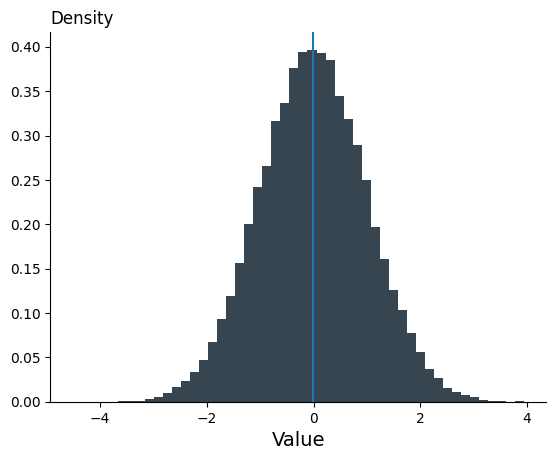

In [11]:
results = jax.random.normal(jax.random.PRNGKey(0), shape=(50000,))
plt.hist(results, bins=50, density=True, color="#36454F")
plt.axvline(jnp.mean(results))
plt.title('Density', loc='left')
plt.xlabel("Value", size=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### **Quantiles of Standard Normal Distribution**

In [15]:
xs = jnp.linspace(0, 1, 100)
ys = jax.scipy.stats.norm.ppf(xs)

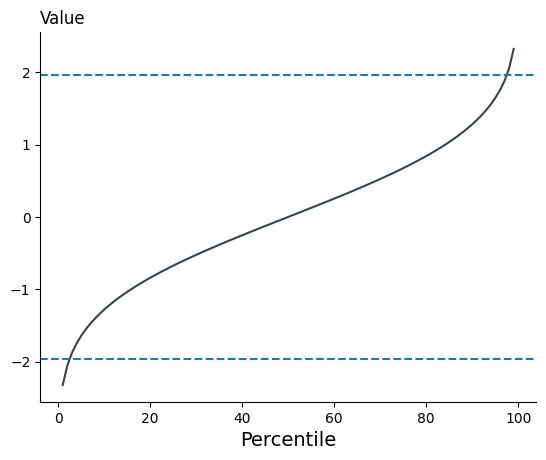

In [22]:
plt.plot(xs*100, ys, color="#36454F")
plt.axhline(jax.scipy.stats.norm.ppf(0.025), linestyle='--')
plt.axhline(jax.scipy.stats.norm.ppf(0.975), linestyle='--')
plt.xlabel('Percentile', size=14)
plt.title('Value', loc='left')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### **Confidence Intervals**

In [51]:
def sample_standard_deviation(n, candidate, key):
    votes = jax.random.choice(key, a=jnp.array([0, 1, 2]), p=p, shape=(n,))
    specific_candidate_votes = (votes == candidate).astype(jnp.float32)
    variance = (1 / (n - 1)) * jnp.sum((specific_candidate_votes - jnp.mean(specific_candidate_votes)) ** 2)
    standard_deviation = jnp.sqrt(variance)
    return standard_deviation

def confidence_intervals(n, candidate, key):
  sm = sample_mean(n, candidate, key)
  sstd = sample_standard_deviation(n, candidate, key)
  return sm - 1.96*sstd/jnp.sqrt(n), sm + 1.96*sstd/jnp.sqrt(n)

def check_confidence_intervals(n, candidate, key):
  lower, upper = confidence_intervals(n, candidate, key)
  return ((p[candidate] >= lower) * (p[candidate] <= upper)).astype(jnp.float32)

check_confidence_intervals(n, 0, key)

Array(1., dtype=float32)

### **Simulate**

In [54]:
f = partial(check_confidence_intervals, n, 0)
keys = jax.random.split(jax.random.PRNGKey(0), 10000)
results = jax.vmap(f)(keys)

In [55]:
jnp.mean(results)

Array(0.95269996, dtype=float32)